#Assignment 2

##Tasks:-
1. Download the dataset: Dataset
2. Load the dataset.
3. Perform Below Visualizations.
  * Univariate Analysis
  * Bi - Variate Analysis
  * Multi - Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Handle the Missing values.
6. Find the outliers and replace the outliers
7. Check for Categorical columns and perform encoding.
8. Split the data into dependent and independent variables.
9. Scale the independent variables
10. Split the data into training and testing


# Mounting Drive for dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Importing libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

Downloading and Importing the Dataset


In [3]:
data = pd.read_csv('/content/drive/MyDrive/IBM/Churn_Modelling.csv')

data = data.iloc[:,3:]
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Visualizations 

###1. Univariate Analysis

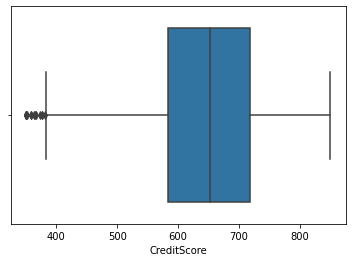

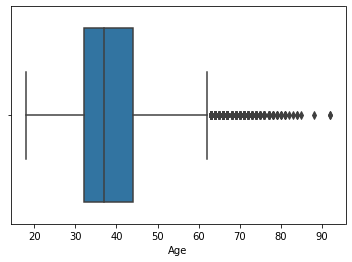

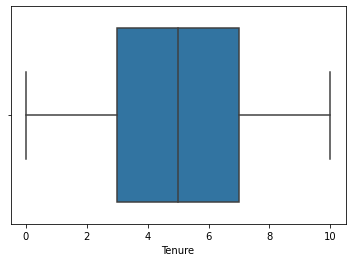

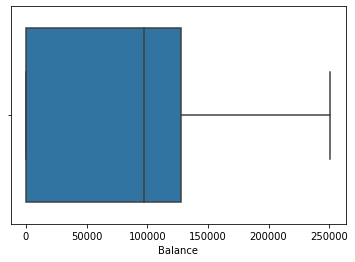

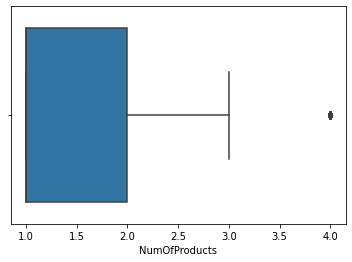

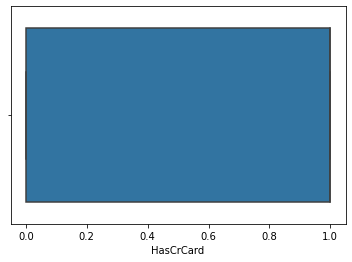

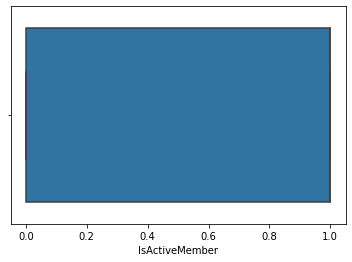

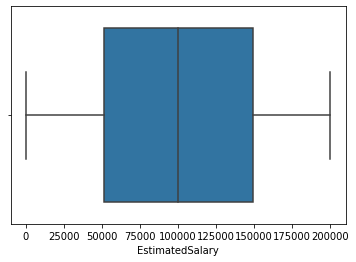

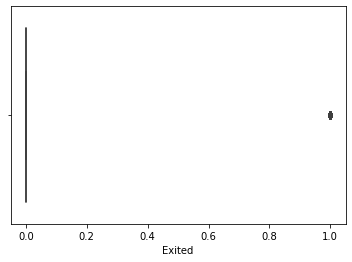

In [4]:
for col in data.columns:
  if(data.dtypes[col]=='int64' or data.dtypes[col]=='float64' ):
    sns.boxplot(x=data[col]).set( xlabel=col)
    plt.show()

### 2. Bi-Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


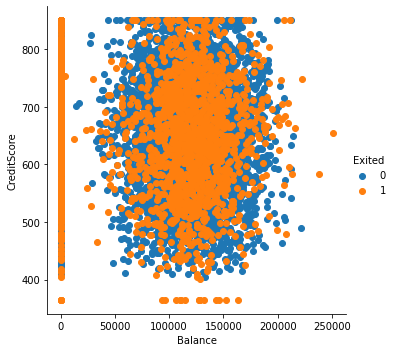

In [30]:
sns.FacetGrid(data,hue='Exited',size=5).map(plt.scatter,"Balance","CreditScore").add_legend()
plt.show()

###3.Multivariate

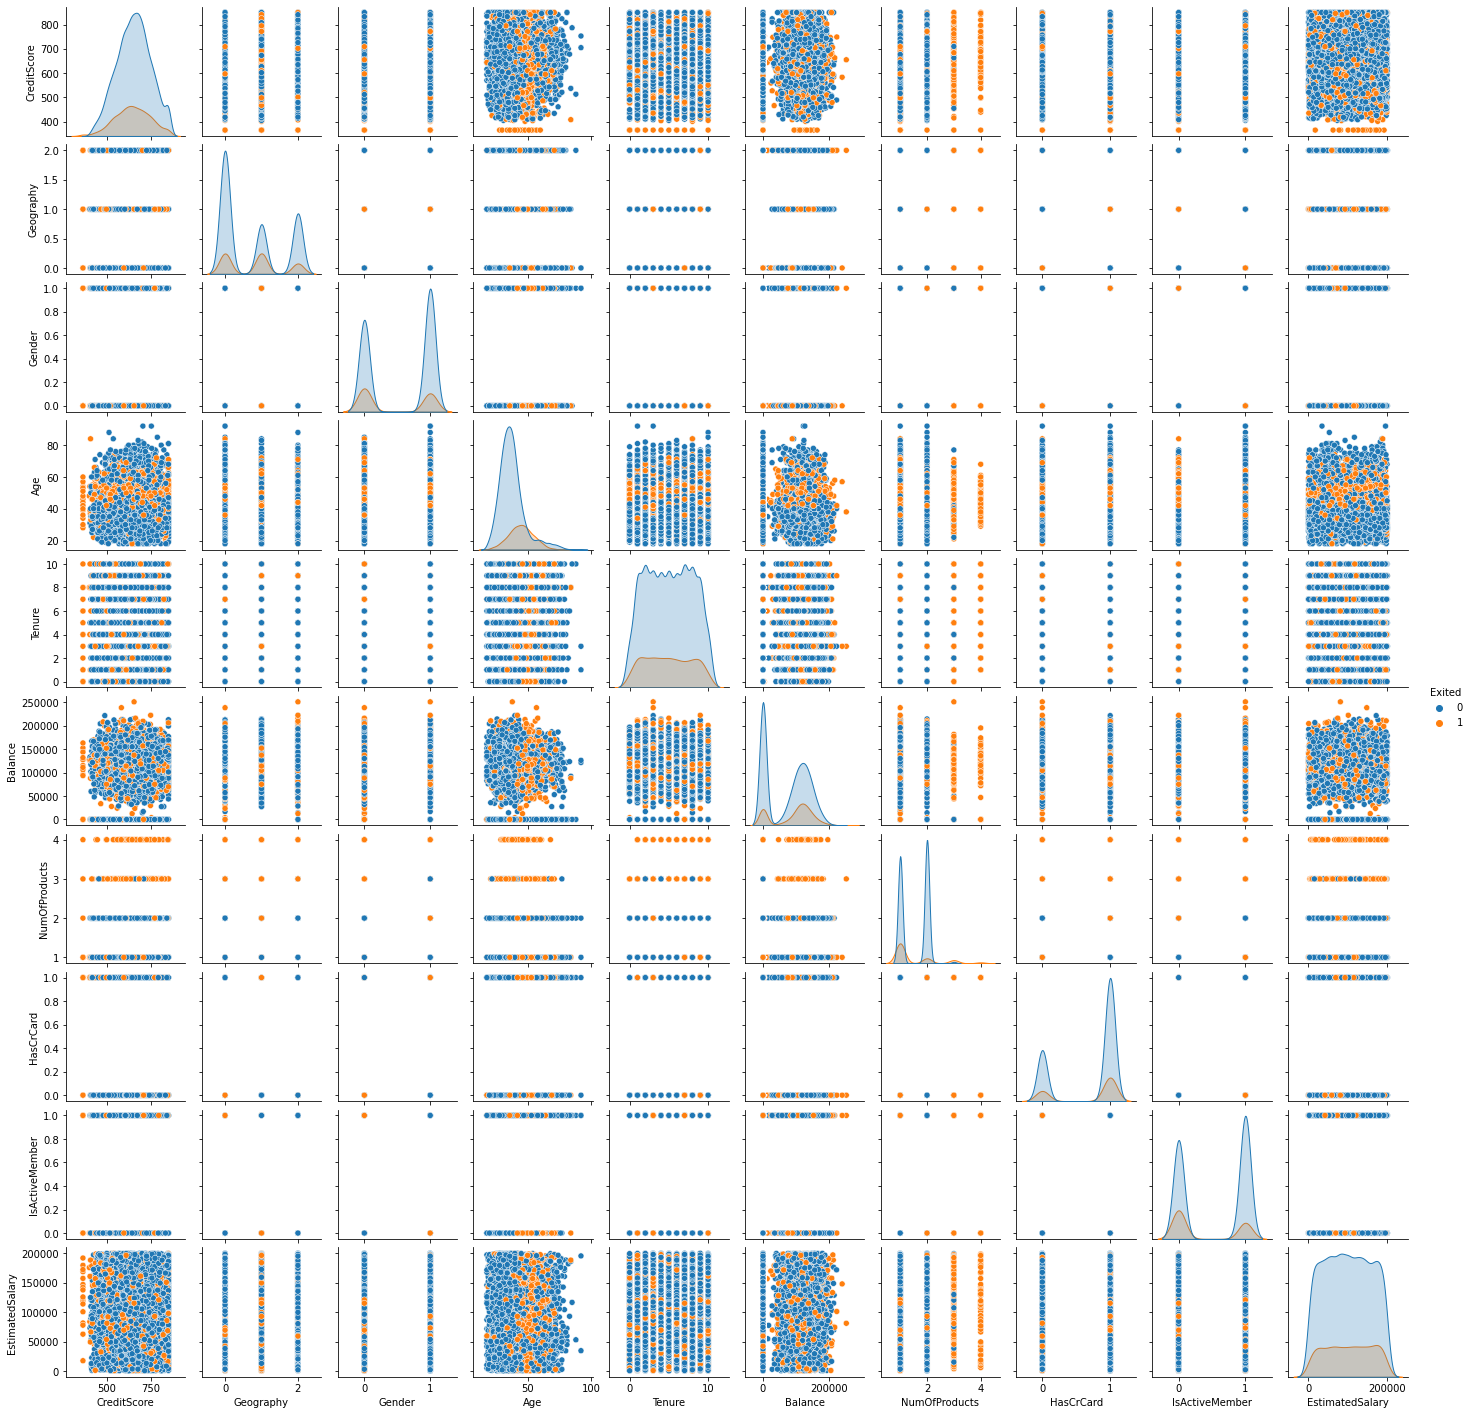

In [26]:
sns.pairplot(data, hue='Exited', height=2)

#Descriptive Analysis

In [7]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Handling Missing Values
### Since there is no null values this task is skipped

In [8]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#Finding and Removing the Outliers
### Outliers are found using the univariate BOXPLOT from Task 3



In [9]:
CreditsMedian = data.loc[data['CreditScore']<400, 'CreditScore'].median()
ProdMedian = data.loc[data['NumOfProducts']>=3.5,'NumOfProducts'].median()

data.loc[data.CreditScore < 400, 'CreditScore'] = np.nan
data.fillna(CreditsMedian,inplace=True)
data.loc[data.NumOfProducts > 3, 'NumOfProducts'] = np.nan
data.fillna(ProdMedian,inplace=True)

#Label Encoding (Categorical)

In [10]:
labelencoder = LabelEncoder()
data['Geography']= labelencoder.fit_transform(data['Geography'])
data['Gender'] = labelencoder.fit_transform(data['Gender']) 


#Seperating Dependent and Independent Values


In [11]:
independent = data.iloc[:, :-1]
dependent = data.iloc[:,-1:]

# Scaling the Independent Variables

In [32]:
nm =MinMaxScaler()
N_independent = nm.fit_transform(independent)

# Spliting the Train and Test Data

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(N_independent,dependent,test_size=0.3)
print(xtrain,xtest,ytrain,ytest)

[[0.23298969 0.         0.         ... 0.         1.         0.46664987]
 [0.37938144 0.5        1.         ... 1.         0.         0.54768615]
 [0.46391753 1.         0.         ... 0.         1.         0.9596951 ]
 ...
 [0.92371134 1.         1.         ... 0.         1.         0.57866316]
 [0.6        1.         1.         ... 1.         0.         0.6690774 ]
 [0.76082474 0.         0.         ... 1.         1.         0.06394436]] [[0.90103093 0.         1.         ... 1.         1.         0.6723019 ]
 [0.68453608 0.5        1.         ... 1.         1.         0.26787338]
 [0.69896907 0.5        0.         ... 1.         0.         0.85988047]
 ...
 [0.31546392 0.         1.         ... 0.         1.         0.81154255]
 [0.39793814 0.         0.         ... 1.         1.         0.71793711]
 [0.31134021 1.         0.         ... 0.         1.         0.56155148]]       Exited
8242       1
8063       0
555        1
8119       1
1426       0
...      ...
8505       0
5441    